#Data Cleansing Project in Telco Dataset

##Introduction

DQLab Telco is a Telco company that already has many branches spread everywhere. Since its establishment in 2019, DQLab Telco has consistently paid attention to its customer experience so that it will not be abandoned by customers.

Even though it is only a little over a year old, DQLab Telco already has many customers who have switched subscriptions to competitors. The management wants to reduce the number of churn customers by using machine learning.

Therefore, the Data Scientist team was asked to prepare data as well as create the right prediction model to determine whether customers will churn or not.

So my task in this project is to perform Data Cleansing on June 2020 report, before this Data is used by the Data Scientist team.

The step that I'll perform are:
1. Find a valid Customer ID
2. Handling missing values
3. Handling outliers from all variables
4. Standardize variables values


##Library

The library that I'll use in this project are:
1. **Pandas** data frame to perform data cleansing
2. **Matplotlib** for data visualization
3. *Seaborn* for using a box plot

##Dataset
The dataset is in the CSV format and located at https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv'
The dataset consists of these columns:
* UpdatedAt Periode of Data taken
* customerID Customer ID
* gender Whether the customer is a male or a female (Male, Female)
* SeniorCitizen Whether the customer is a senior citizen or not (1, 0)
* Partner Whether the customer has a partner or not (Yes, No)
* Dependents Whether the customer has dependents or not (Yes, No)
* tenure Number of months the customer has stayed with the company
* PhoneService Whether the customer has a phone service or not (Yes, No)
* MultipleLines Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod The customer’s payment method (Electronic check, Mailed check, * Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges The amount charged to the customer monthly
* TotalCharges The total amount charged to the customer
* Churn Whether the customer churned or not (Yes or No)

##1. Import Library and Dataset

The first step in this project is to import the library and dataset.

After importing the dataset, I'll print the total columns and rows of this dataset, print 5 upper rows of the data, and find how many CustomerID that unique.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 50
# Importing Data Source
df_load = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/dqlab_telco.csv')

In [2]:
print(df_load.shape)

(7113, 22)


In [3]:
print(df_load.head(5))

   UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService OnlineSecurity OnlineBackup  \
0           No  No phone service             DSL             No          Yes   
1          Yes                No             DSL            Yes           No   
2          Yes                No             DSL            Yes          Yes   
3           No  No phone service             DSL            Yes           No   
4          Yes                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV S

In [4]:
print(df_load.customerID.nunique())

7017


There are 7113 rows and 22 columns of data, and from 7113 rows of data, there are 7017 unique customer IDs.

##2.a. Find a valid Customer IDs

A Valid customer ID has a criteria like these:
1. The character length is 11-12.
2. Consists of numbers only, no characters other than numbers are allowed
3. The first 2 digits, starting with the number 45.

I will use str.match() & regex to match the criteria above. Since I'm using regex so I have to change the data type from numeric to string with astype(). And last I'll count how many customer IDs that match the criteria above with count().

In [5]:
df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)

In [6]:
print('The result of filtered customer IDs are',df_load['customerID'].count())

The result of filtered customer IDs are 7006


##2.b. Filter Duplicate Customer ID Numbers

The next step is, ensure that there are no duplicate customer ID numbers. Usually duplication of this type of ID number:

- Duplication due to inserting more than once with the same value for each column
- Duplication due to different inserting periods of data collection

I'll use the results from processing in the previous df_load to be processed and I'll use the drop_duplicates() function to remove duplicate rows, and sort_values() to check the last data fetch.

In [7]:
# Drop Duplicate Rows
df_load.drop_duplicates()
# Drop duplicate ID sorted by Periode
df_load=df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates('customerID')

In [8]:
print('The result of the number of Customer IDs, that have been removed from its duplicates (distinct) are',df_load['customerID'].count())

The result of the number of Customer IDs, that have been removed from its duplicates (distinct) are 6993


The validity of the customer ID number is needed to ensure that the data retrieved is correct. Based on these results, there is a difference in the number of ID numbers from the first time the data is loaded to the final result. The number of data rows when it was first loaded was 7113 rows and 22 columns with 7017 unique ID numbers. Then after checking the validity of the customer ID, the remaining 6993 rows of data that match the criteria above.

##3.a. Handling Missing Values by Eliminating Rows

Next, I will delete rows from data that are not detected whether it has a churn flag or not. It is assumed that the data modeler only wants to receive data that has a churn flag or not.

I'll use isnull() to detect missing values and dropna() to delete data with missing values.

In [9]:
print('The total missing values from column Churn are',df_load['Churn'].isnull().sum())

The total missing values from column Churn are 43


In [10]:
# Dropping all Rows with spesific column (churn)
df_load.dropna(subset=['Churn'],inplace=True)

In [11]:
print('Total Rows and Columns after Missing Values have been deleted are',df_load.shape)

Total Rows and Columns after Missing Values have been deleted are (6950, 22)


##3.b. Handling Missing Values by Filling in certain Values

Apart from deleting missing values rows from the data, missing values can be handled by filling certain values. 

It is assumed that the data modeler asks to fill in the missing values with the following criteria:

- The data modeler's tenure asks for each row that has missing values for the length of subscription to be filled with 11.

- Variables that are numeric other than Tenure are filled in with the median of each of these variables.

The first step, I'll look for missing values in all columns

In [12]:
print('Status Missing Values :',df_load.isnull().values.any())
print('\nThe total Missing Values in all columns are:')
print(df_load.isnull().sum().sort_values(ascending=False))

Status Missing Values : True

The total Missing Values in all columns are:
tenure              99
MonthlyCharges      26
TotalCharges        15
UpdatedAt            0
DeviceProtection     0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
customerID           0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
Churn                0
dtype: int64


Next, I'll be filling in missing values as per the criteria above.

In [13]:
#handling missing values Tenure fill with 11
df_load['tenure'].fillna(11,inplace=True)

#Loop
#Handling missing values num vars (except Tenure)
for col_name in  list(['MonthlyCharges','TotalCharges']):
    #write your command here
	median = df_load[col_name].median()
	df_load[col_name].fillna(median,inplace=True)

And lastly, I'll check again the status of the missing values from all columns.

In [14]:
print('\nThe total Missing Values from all columns after using imputer are:')
print(df_load.isnull().sum().sort_values(ascending=False))


The total Missing Values from all columns after using imputer are:
UpdatedAt           0
customerID          0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        0
tenure              0
Dependents          0
Partner             0
SeniorCitizen       0
gender              0
Churn               0
dtype: int64


After further analysis, it turns out that there are still missing values from the data that the customer's Id Number has been validated. Missing values are found in the Churn, tenure, MonthlyCharges & TotalCharges columns. After handling it by deleting rows and filling in rows with a certain value, there are no more missing values in the data, as the number of missing values for each variable has a value of 0. Next, I'll handle outliers.

##4. Detecting Outliers with Boxplot

Outliers can be detected by using Boxplot.A boxplot is a summary of the sample distribution presented graphically which can describe the shape of the data distribution (skewness), a measure of central tendency, and a measure of dispersion (diversity). 

First, let's see which columns that has outliers using describe() function.

In [15]:
print(df_load.describe())

       UpdatedAt  SeniorCitizen       tenure  MonthlyCharges  TotalCharges
count     6950.0    6950.000000  6950.000000     6950.000000   6950.000000
mean    202006.0       0.162302    32.477266       65.783741   2305.083460
std          0.0       0.368754    25.188910       50.457871   2578.651143
min     202006.0       0.000000     0.000000        0.000000     19.000000
25%     202006.0       0.000000     9.000000       36.462500    406.975000
50%     202006.0       0.000000    29.000000       70.450000   1400.850000
75%     202006.0       0.000000    55.000000       89.850000   3799.837500
max     202006.0       1.000000   500.000000     2311.000000  80000.000000


From describe() function, columns tenure, MonthlyCharges, and TotalCharges are having a max value that too far from their mean. That's indicating the existence of outliers. Let's see their Boxplot.

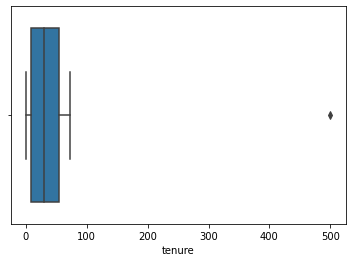

In [16]:
#For tenure column
plt.figure()
sns.boxplot(x=df_load['tenure'])
plt.show()

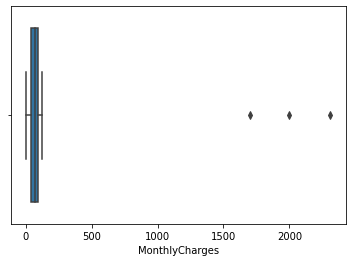

In [17]:
# For MonthlyCharges column
plt.figure()
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

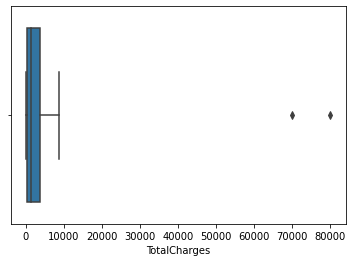

In [18]:
#The last for TotalCharges column
plt.figure()
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

From their Boxplot, there are some Outliers from those 3 columns, next, let's handle it using Interquartile Range (IQR). I'll use IQR to define the Minimum and Maximum values from IQR. And then using the mask() function, I'll change the value that exists outside the Minimum and Maximum value into Minimum and Maximum values.

In [19]:
Q1=(df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3=(df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

IQR=Q3-Q1

In [20]:
maximum = Q3 + (1.5*IQR)
print('Maximum values from each variable are: ')
print(maximum)

Maximum values from each variable are: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64


In [21]:
minimum = Q1 - (1.5*IQR)
print('\nMinimum values from each variable are: ')
print(minimum)


Minimum values from each variable are: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64


In [22]:
more_than = (df_load > maximum)
lower_than = (df_load < minimum)
df_load = df_load.mask(more_than,maximum,axis=1)
df_load = df_load.mask(lower_than,minimum,axis=1)

<ipython-input-22-04444ddaf6a7>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (df_load > maximum)
<ipython-input-22-04444ddaf6a7>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (df_load < minimum)


In [23]:
print('\nMaximum values from each variable are: ')
print(df_load[['tenure','MonthlyCharges','TotalCharges']].describe())


Maximum values from each variable are: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


After handling the outliers, and looking at the distribution of the data, it can be seen that there are no more outlier values.

##5.Detecting Non-Standard Values

I'll Detect whether there are values of non-standard categorical variables. This usually occurs due to data input errors. The difference in terms is one of the factors that often occur, for this reason, standardization of the data that has been input is needed.

I'll using the value_counts() function to see the number of unique data per variable.

In [24]:
#Loop
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']):
  #write your command here
	print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
	print(df_load[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Befor

From the results, 3 columns have non-standard value. There are gender, Dependents, and Churn. Those variables are:

- Gender (Female, Male, Wanita, Laki-laki), which can be standardized in value to (Female, Male) because they have the same meaning.
- Dependents (Yes, No, Iya), whose values can be standardized to (Yes, No) because they have the same meaning.
- Churn (Yes, No, Churn), whose value can be standardized to (Yes, No) because it has the same meaning.

I'll be using replace() function to replace those non-standard values

In [25]:
df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

# Masukkan variable
for col_name in list(['gender','Dependents','Churn']):
    print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
    print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


After we standardize the value, and we observe again the form of the data, it is well standardized for the unique value.

And with that, the data cleansing process from this Telco data is finished, and the data has free from missing values, duplicate values, and outliers. Invalid and non-standard values has been handled too. 
